Saving nba_advanced_stats_2024_2025.csv to nba_advanced_stats_2024_2025 (13).csv


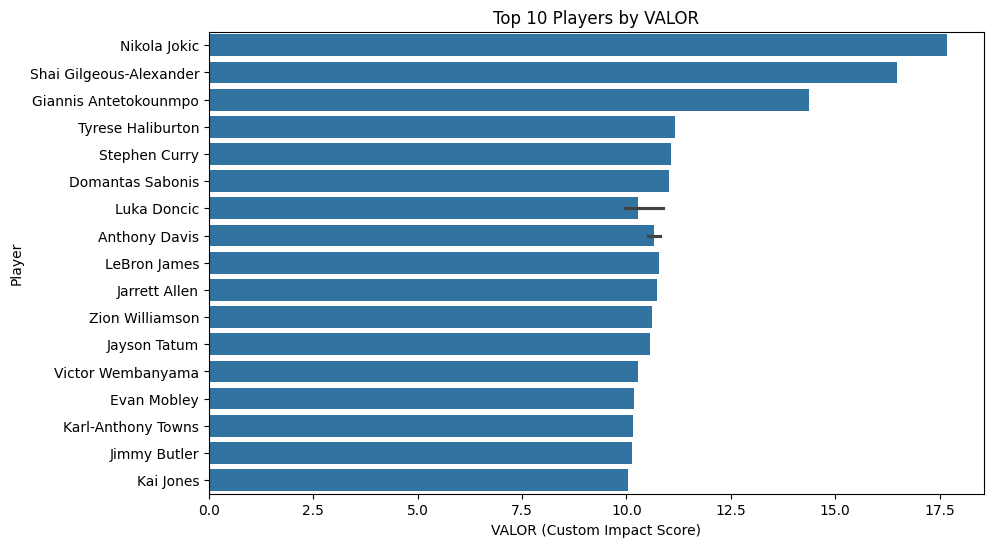

In [19]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('nba_advanced_stats_2024_2025.csv')

# Filter out irrelevant or low-sample players
df_filtered = df[(df['VORP'] > 0.1) & (df['WS'] > 0.1) & (df['PER'] > 5)]

# Compute VALOR Score
df_valor = df_filtered.dropna(subset=['TS%'])  # drop players with missing TS%
df_valor['VALOR'] = (
    0.30 * df_valor['BPM'] +
    0.30 * df_valor['VORP'] +
    0.15 * df_valor['PER'] +
    0.10 * df_valor['WS'] +
    0.10 * df_valor['OBPM'] +
    0.05 * df_valor['TS%'] * 100  # convert to 0–100 scale
)

# Plot Top 10 Players by VALOR
import seaborn as sns
import matplotlib.pyplot as plt

top_valor = df_valor.sort_values(by='VALOR', ascending=False).head(20)


plt.figure(figsize=(10,6))
sns.barplot(x='VALOR', y='Player', data=top_valor)
plt.title('Top 10 Players by VALOR')
plt.xlabel('VALOR (Custom Impact Score)')
plt.ylabel('Player')
plt.show()
